# Air quality prediction 

In [1]:
## Libraries
import pandas as pd

In [2]:
## Data
df = pd.read_csv('city_day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [5]:
## Data preprocessing 
# For numerical columns, fill missing values with the mean
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [6]:
# For categorical columns, fill missing values with the most frequent value
categorical_cols = ['City', 'Date', 'AQI_Bucket']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [7]:
print(df.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [8]:
for col in numerical_cols:
    # Calculate the 1st and 99th percentiles
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)
    # Clip outliers
    df[col] = df[col].clip(p1, p99)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,102.441,0.00,0.02,0.00,166.463581,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.060,3.68,5.50,3.77,166.463581,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.700,6.80,16.40,2.25,166.463581,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.080,4.43,10.14,1.00,166.463581,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.310,7.01,18.89,2.78,166.463581,Moderate


In [12]:
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
print(df.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      66.426331    117.331274     17.213874     28.221596     31.945964   
std       52.672643     66.578174     18.925130     20.996635     27.285962   
min        8.293000     16.866000      0.790000      1.663000      0.000000   
25%       32.150000     79.315000      6.210000     12.980000     14.670000   
50%       58.030000    118.127103     11.530000     25.240000     27.550000   
75%       72.450000    118.127103     17.574730     34.665000     36.015000   
max      298.980000    405.394000    110.128000    114.051000    149.890000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      22.934638      2.031145     14.251112     34.305984      2.678678   
std       16.649476      4.612570     14.990328    

In [18]:
correlation_matrix = df.corr()

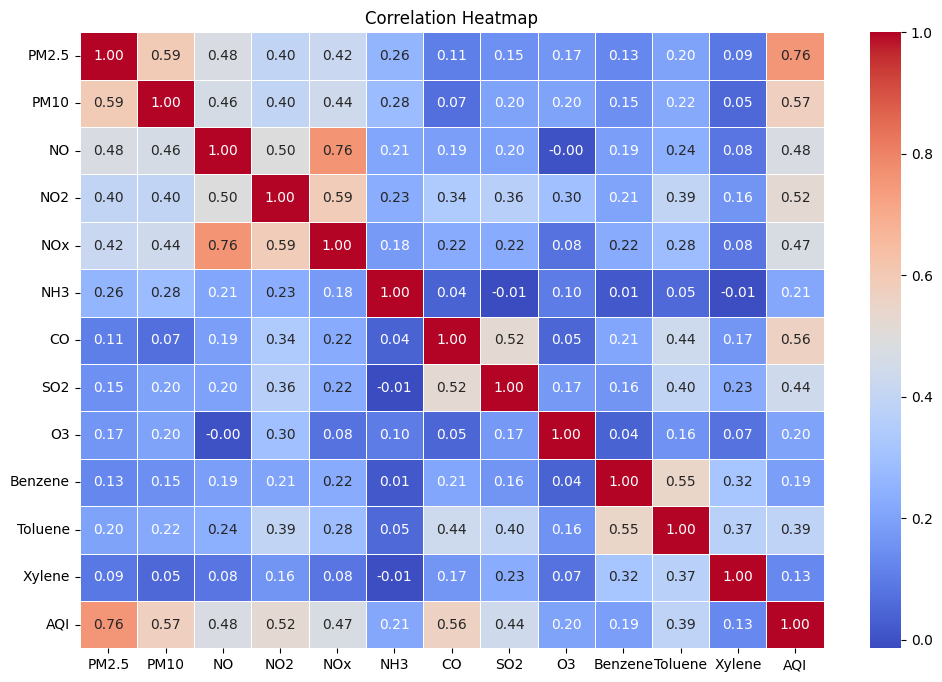

In [17]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

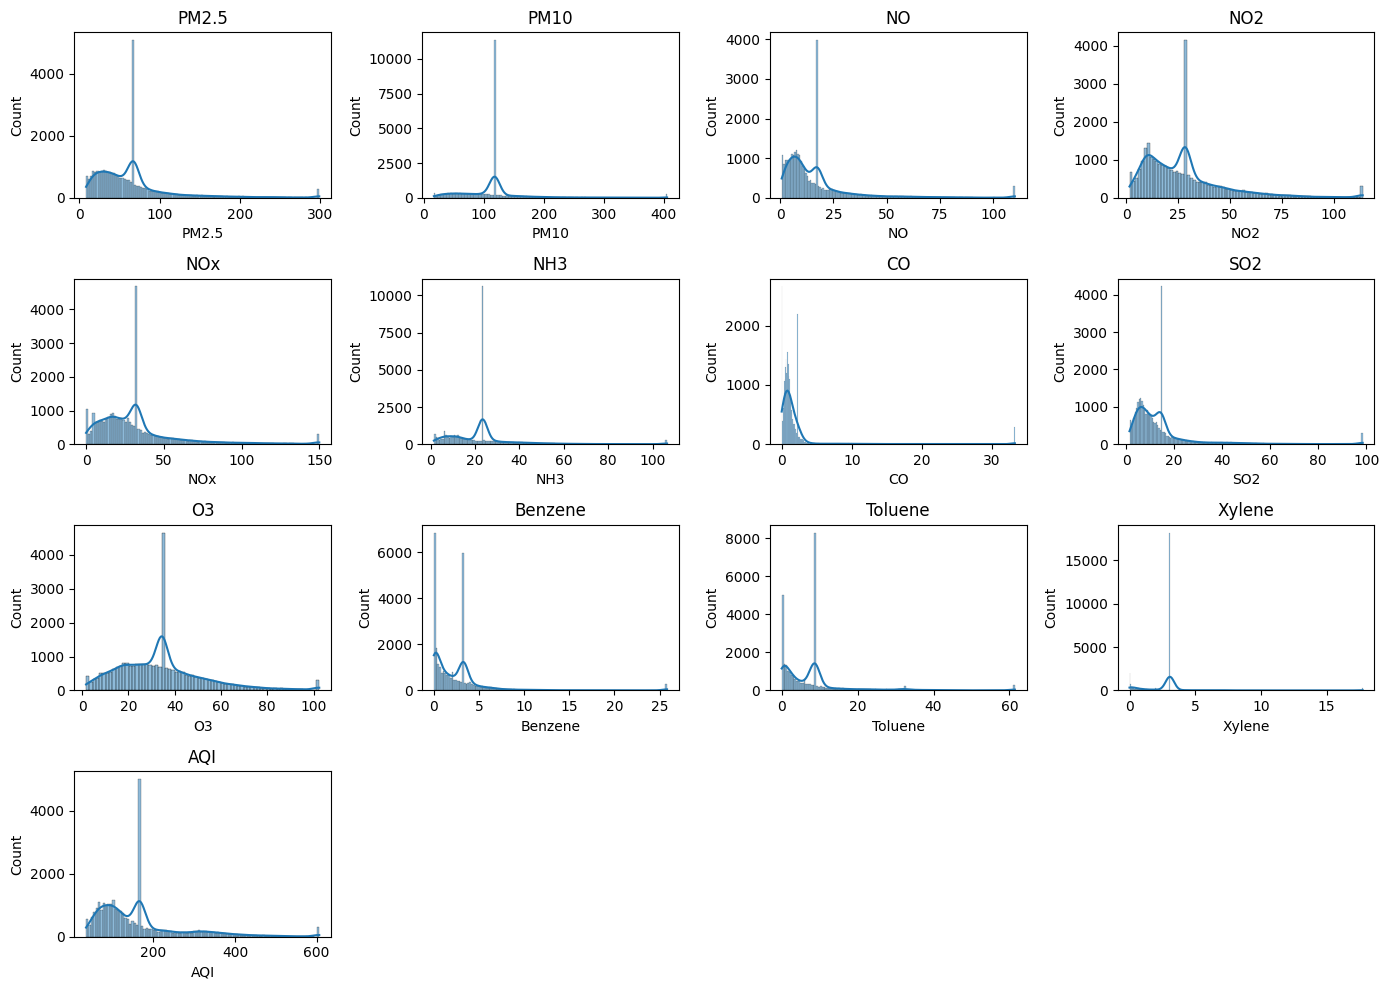

In [19]:
# Distribution plots for numerical columns
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

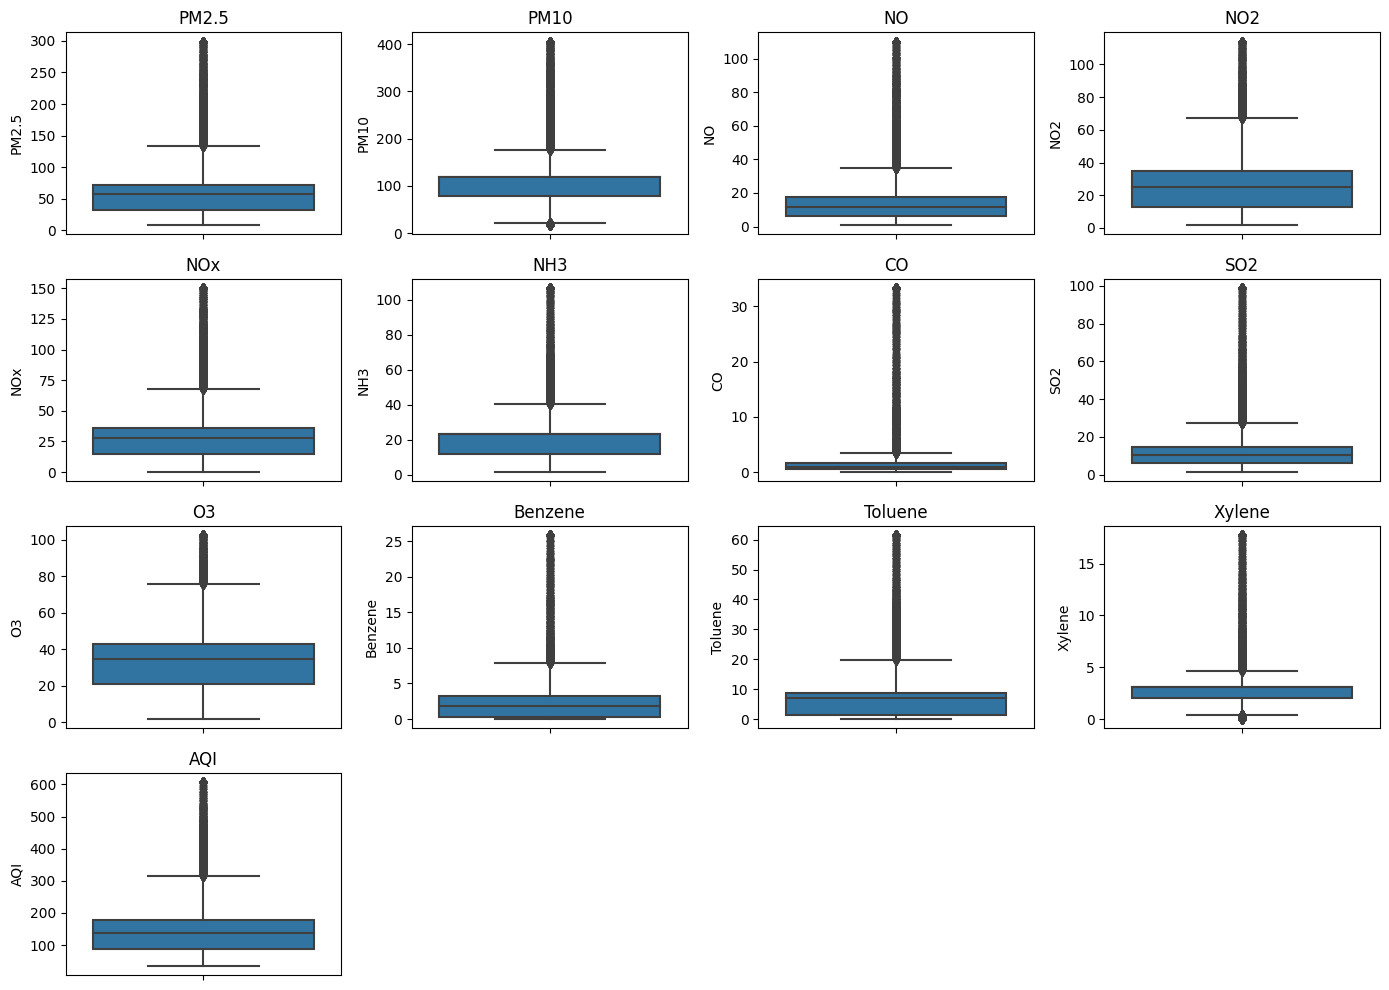

In [20]:
# Boxplots for numerical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


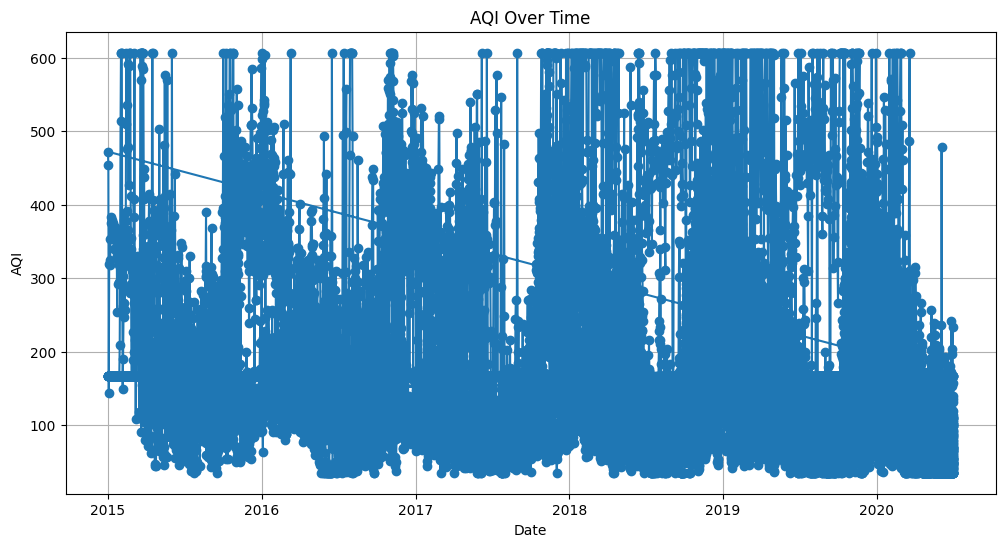

In [21]:
# Time series plot for AQI
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AQI'], marker='o', linestyle='-')
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

In [23]:
# Select relevant features
relevant_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 
                     'Benzene', 'Toluene', 'Xylene', 'AQI', 'City', 'Date']

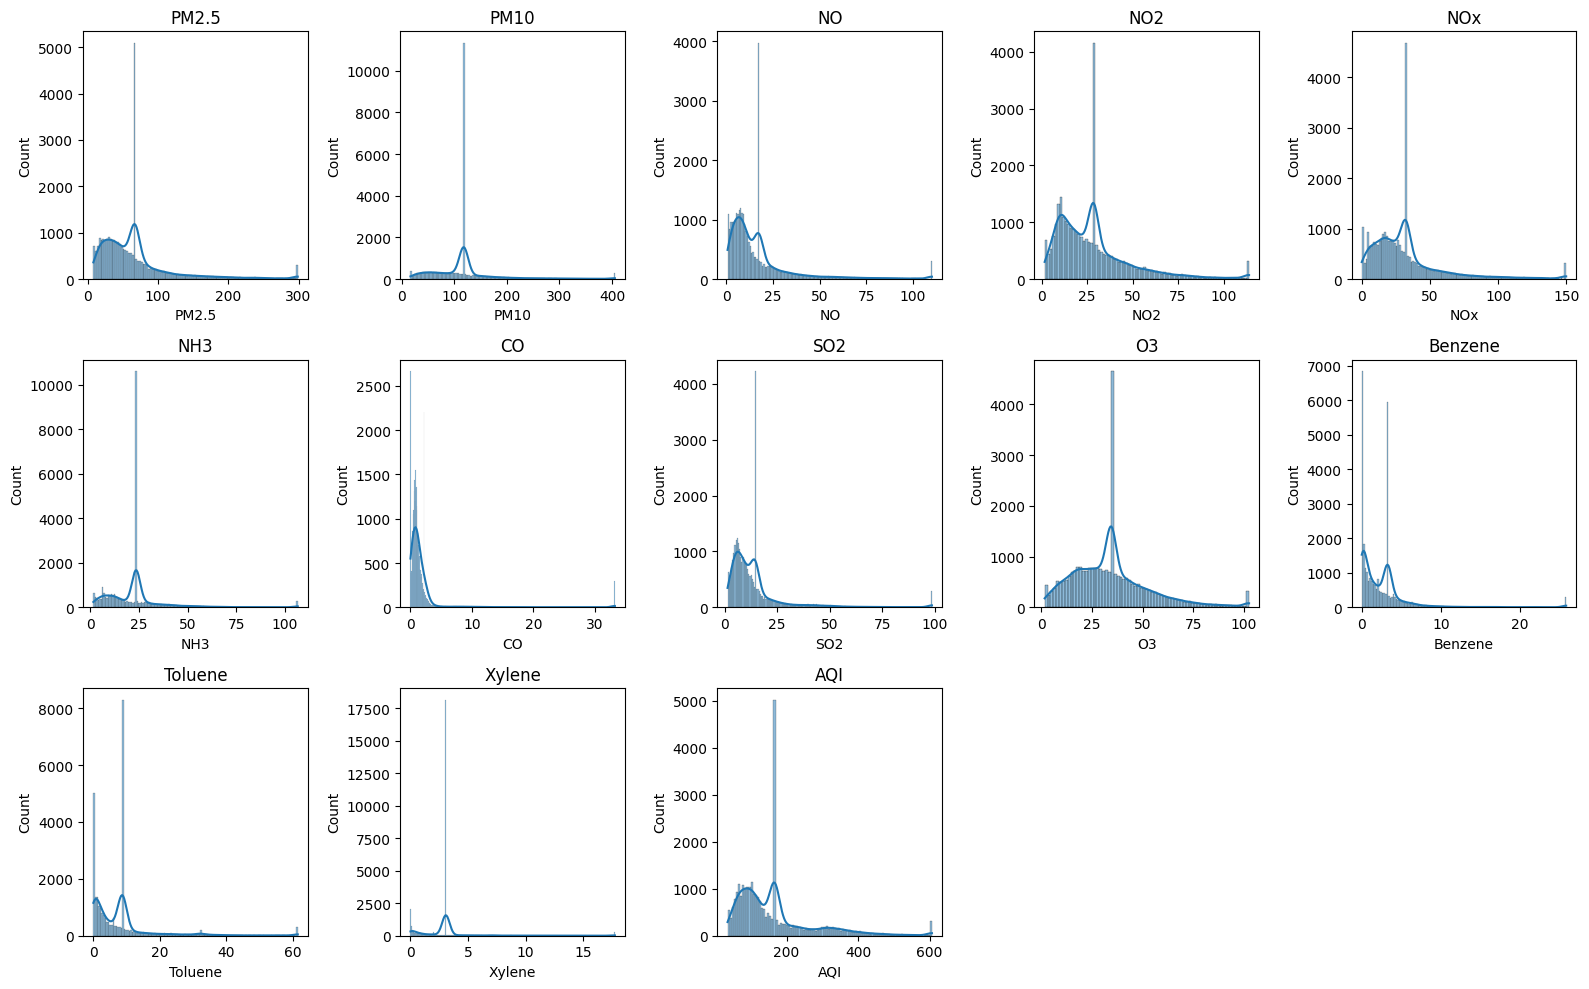

In [24]:
# Explore distributions of relevant features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(relevant_features[:-2], 1):  # Exclude 'City' and 'Date'
    plt.subplot(3, 5, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [25]:
#Aggregating pollutant levels over different time periods (daily averages)
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime type
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [26]:
# Daily averages of pollutant levels
daily_pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df['Daily_Avg_PM2.5'] = df.groupby(['Year', 'Month', 'Day'])['PM2.5'].transform('mean')

In [27]:
# Example: Lagged features (previous day's PM2.5)
df['Prev_Day_PM2.5'] = df.groupby('City')['PM2.5'].shift(1)

In [28]:
# Example: Moving averages (7-day moving average of PM10)
df['7Day_Moving_Avg_PM10'] = df.groupby('City')['PM10'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)


In [29]:
#Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['PM2.5'], period=365)  # Assuming annual seasonality
df['Seasonal_Component_PM2.5'] = decomposition.seasonal

In [30]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,Day,Month,Year,Daily_Avg_PM2.5,Prev_Day_PM2.5,7Day_Moving_Avg_PM10,Seasonal_Component_PM2.5
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,...,0.00,166.463581,Moderate,1,1,2015,106.038815,NaN,118.127103,14.108424
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,...,3.77,166.463581,Moderate,2,1,2015,87.238815,67.450578,118.127103,13.659605
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,...,2.25,166.463581,Moderate,3,1,2015,70.738815,67.450578,118.127103,14.866219
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,...,1.00,166.463581,Moderate,4,1,2015,79.506210,67.450578,118.127103,12.024274
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,...,2.78,166.463581,Moderate,5,1,2015,78.757638,67.450578,118.127103,10.268298


In [34]:
from sklearn.model_selection import train_test_split

In [31]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 
            'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

In [32]:
X = df[features]
y = df[target]

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (23624, 12) Target: (23624,)
Testing set - Features: (5907, 12) Target: (5907,)


In [37]:
## Random Forest Regressor Model and XGB Model 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
# Instantiate Random Forest and XGBoost models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

In [39]:
# Train Random Forest model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Train XGBoost model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [52]:
# Predictions
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

In [53]:
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)

In [45]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [42]:
# Define number of folds
k_folds = 5

In [43]:
# Define KFold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [46]:
# Perform cross-validation for Random Forest model
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)
rf_cv_mae_scores = -cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_absolute_error')

In [47]:
# Perform cross-validation for XGBoost model
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error')
xgb_cv_rmse_scores = np.sqrt(-xgb_cv_scores)
xgb_cv_mae_scores = -cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_absolute_error')

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
# Evaluate Random Forest model
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))
rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)
rf_test_r2 = r2_score(y_test, rf_test_predictions)

In [55]:
print("Random Forest Model Evaluation:")
print(f"Test RMSE: {rf_test_rmse:.2f}")
print(f"Test MAE: {rf_test_mae:.2f}")
print(f"Test R^2: {rf_test_r2:.4f}")

Random Forest Model Evaluation:
Test RMSE: 35.11
Test MAE: 19.20
Test R^2: 0.8941


In [56]:
# Evaluate XGBoost model
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_predictions))
xgb_test_mae = mean_absolute_error(y_test, xgb_test_predictions)
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)


In [57]:
print("\nXGBoost Model Evaluation:")
print(f"Test RMSE: {xgb_test_rmse:.2f}")
print(f"Test MAE: {xgb_test_mae:.2f}")
print(f"Test R^2: {xgb_test_r2:.4f}")


XGBoost Model Evaluation:
Test RMSE: 36.20
Test MAE: 20.46
Test R^2: 0.8874


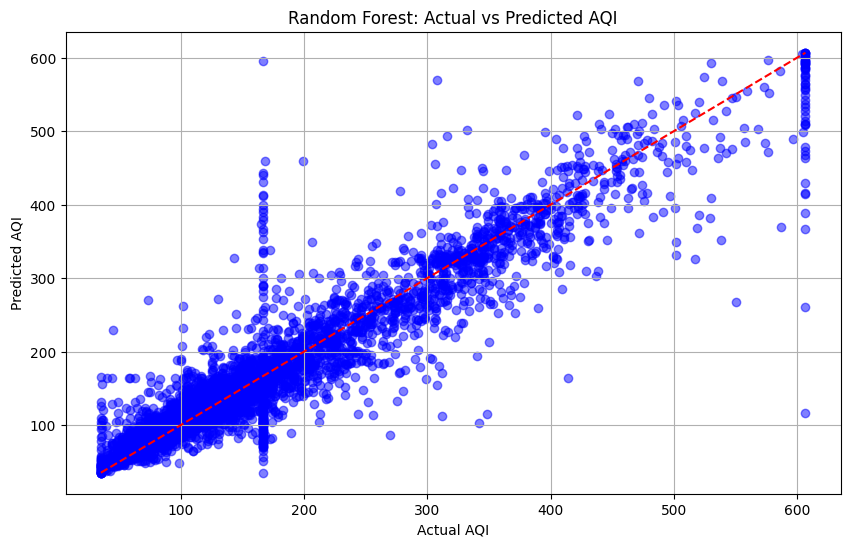

In [58]:
## Visualization of model performance
# Plotting actual vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_test_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Random Forest: Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

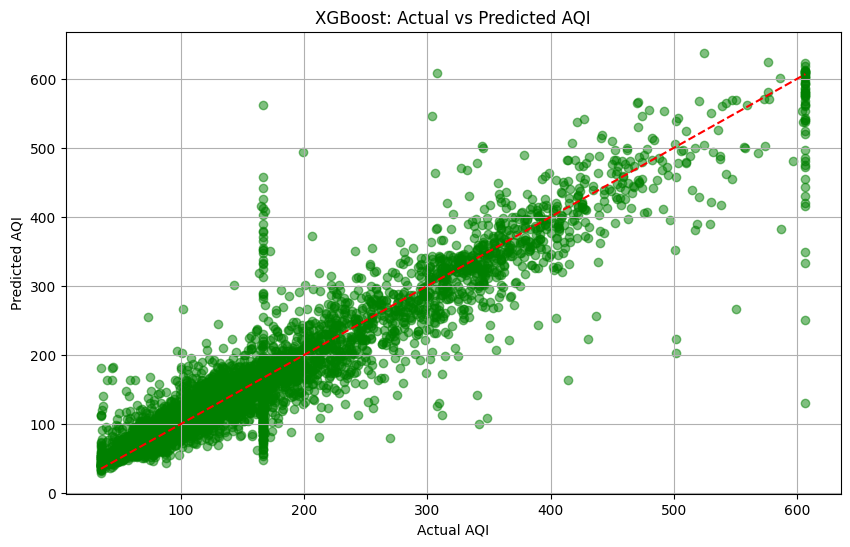

In [59]:
# Plotting actual vs predicted values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_test_predictions, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('XGBoost: Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

In [60]:
# Get feature importances from Random Forest model
rf_feature_importances = rf_model.feature_importances_

In [61]:
# Create a DataFrame to display feature importances
rf_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importances})

In [62]:
# Sort features by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

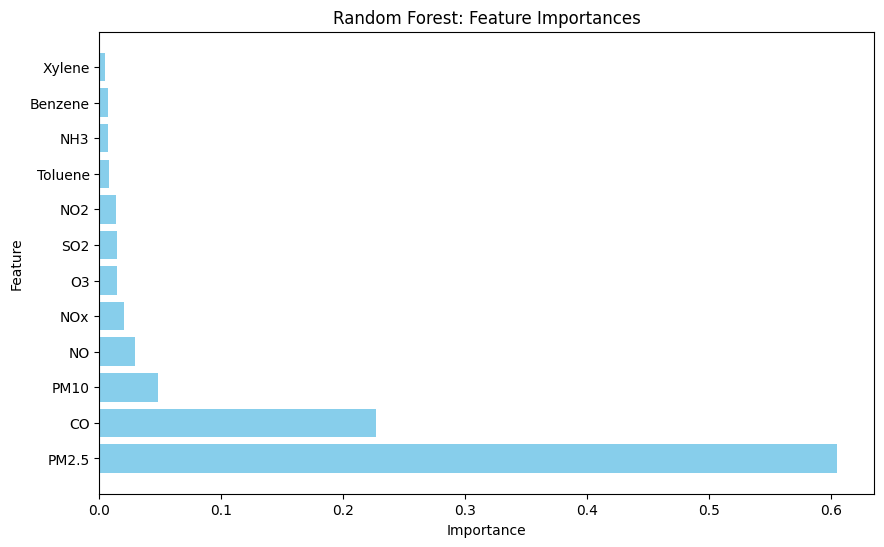

In [63]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest: Feature Importances')
plt.show()

In [64]:
# Get feature importances from XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

In [65]:
# Create a DataFrame to display feature importances
xgb_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_feature_importances})

In [66]:
# Sort features by importance
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

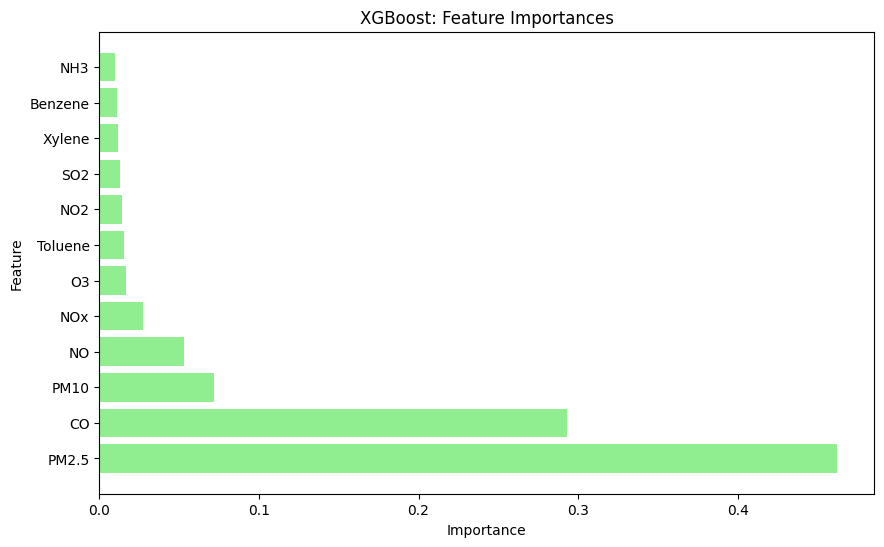

In [67]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_importance_df['Feature'], xgb_feature_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost: Feature Importances')
plt.show()

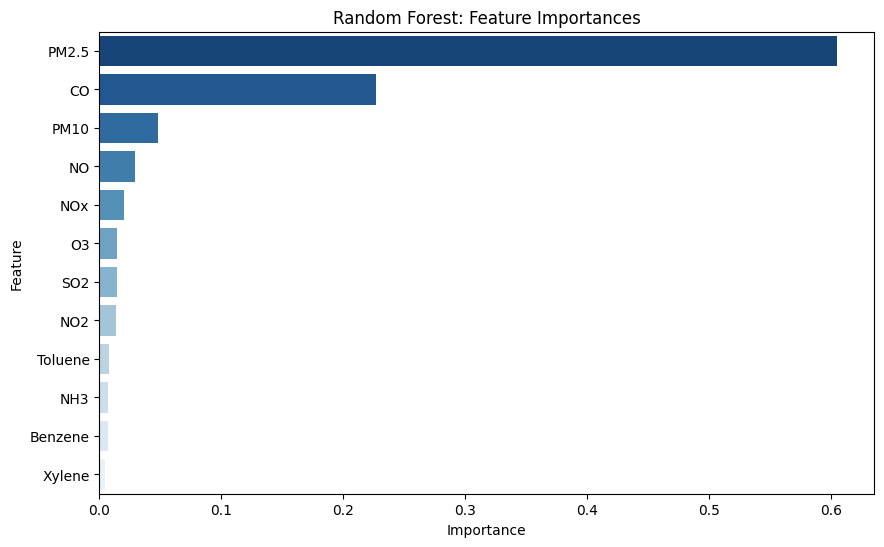

In [68]:
# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df, palette='Blues_r')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest: Feature Importances')
plt.show()

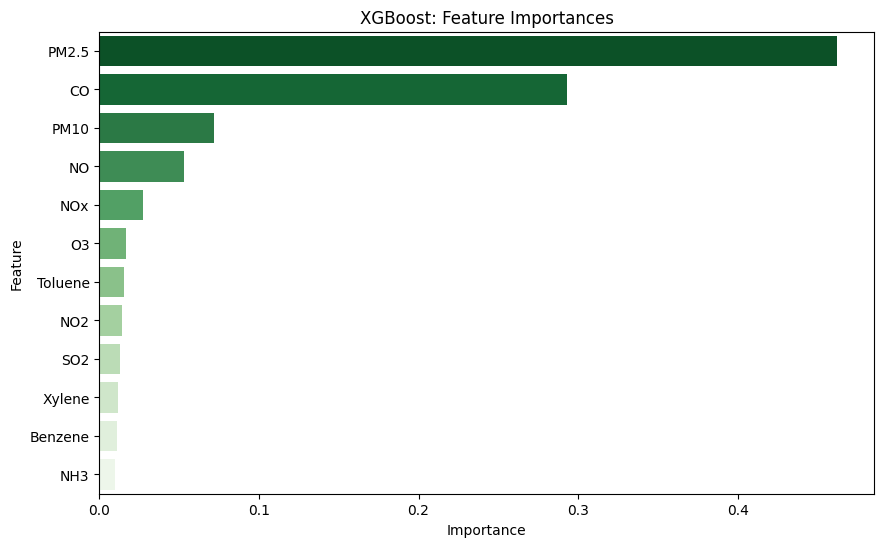

In [69]:
# Plot feature importances for XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df, palette='Greens_r')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost: Feature Importances')
plt.show()